Looking at tilt of thalweg of SalishSeaLake

In [100]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import (nc_tools, viz_tools, gsw_calls, visualisations)
import numpy.ma as ma
from matplotlib import animation, rc
from scipy.optimize import curve_fit
from visualisations import *
%matplotlib inline

In [98]:
rc('animation', html='html5')

In [2]:
lakebathy = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/lake_bathy201702.nc')
lake_meshmask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/lake_meshmask201702.nc')
U24W = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24UW/SalishSea_1h_20170101_20170105_grid_T.nc')

In [102]:
def calc_rho(Sal, TempC, P):
    sqrSal = np.sqrt(Sal)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    return rho
def _fill_in_bathy(variable, mesh_mask, thalweg_pts):
    mbathy = mesh_mask.variables['mbathy'][0, :, :]
    newvar = np.copy(variable)
    mbathy = mbathy[thalweg_pts[:, 0], thalweg_pts[:, 1]]
    for i, level in enumerate(mbathy):
        newvar[level, i] = variable[level-1, i]
    return newvar
def func(x,m,b):
    return m*x + b
thalweg_pts = np.loadtxt('salishsealakethalweg.txt', delimiter=' ', dtype=int)
depth = lake_meshmask.variables['gdept_0'][:]

In [ ]:
file1 = U24W
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0291554375512
13.5354118347
34.6857566833


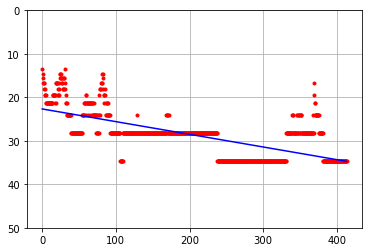

In [103]:
t = 55
rho = 1023.5
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(50,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [107]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US/SalishSea_1h_20160601_20160605_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0392162628388
7.50062322617
34.6857566833


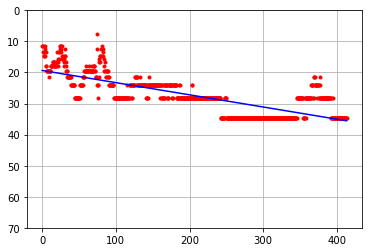

In [124]:
t = 59
rho = 1023.1
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [126]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US/SalishSea_1h_20160601_20160605_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0345388473337
11.509311676
34.6857566833


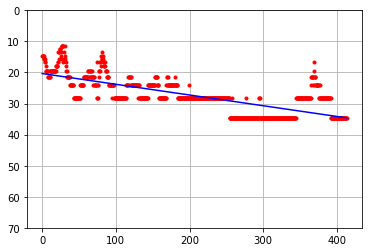

In [129]:
t = 49
rho = 1023.1
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [130]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US/SalishSea_1h_20160601_20160605_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0363051014823
11.509311676
44.5177230835


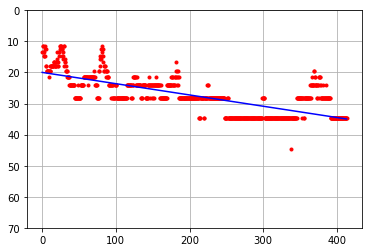

In [136]:
t = 47
rho = 1023.1
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [138]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48UW/SalishSea_1h_20170101_20170105_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0296076148042
13.5354118347
44.5177230835


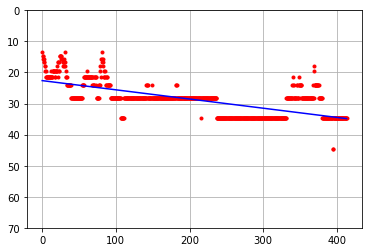

In [144]:
t = 48
rho = 1023.5
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [145]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72UW/SalishSea_1h_20170101_20170105_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.03231669898
13.5354118347
44.5177230835


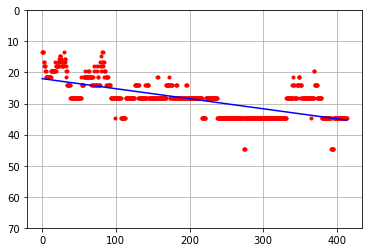

In [152]:
t = 45
rho = 1023.5
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [169]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24UW0.1/SalishSea_1h_20170101_20170105_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0130403559372
6.50031042099
24.1002559662


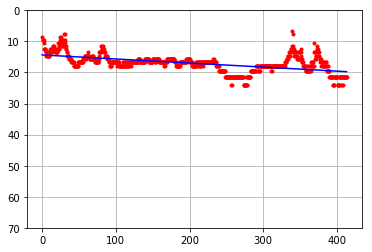

In [171]:
t = 47
rho = 1023.1
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [172]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48UW0.1/SalishSea_1h_20170101_20170105_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0138301056592
7.50062322617
24.1002559662


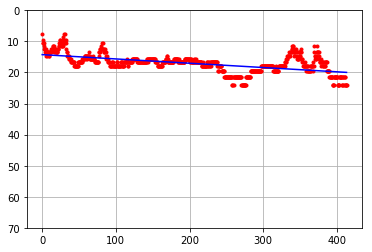

In [179]:
t = 41
rho = 1023.1
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [180]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72UW0.1/SalishSea_1h_20170101_20170105_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0133340379404
7.50062322617
24.1002559662


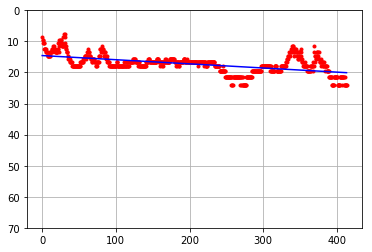

In [193]:
t = 36
rho = 1023.1
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [194]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US0.1/SalishSea_1h_20160601_20160605_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.014394177718
5.50015068054
19.4817848206


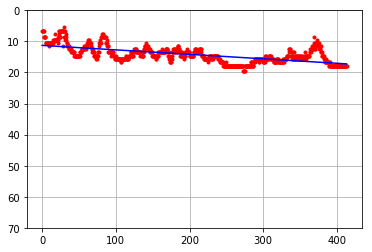

In [204]:
t = 53
rho = 1022.5
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [205]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US0.1/SalishSea_1h_20160601_20160605_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0137682248045
6.50031042099
19.4817848206


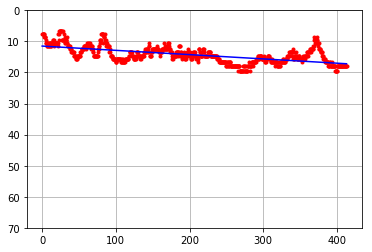

In [212]:
t =48
rho = 1022.5
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [213]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US0.1/SalishSea_1h_20160601_20160605_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0159920020222
6.50031042099
19.4817848206


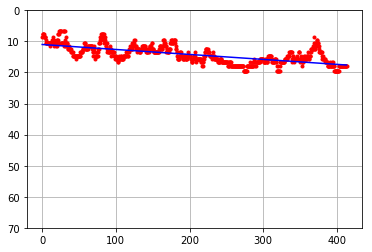

In [220]:
t = 45
rho = 1022.5
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [221]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US0.3/SalishSea_1h_20160601_20160605_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0398875730701
14.5689821243
44.5177230835


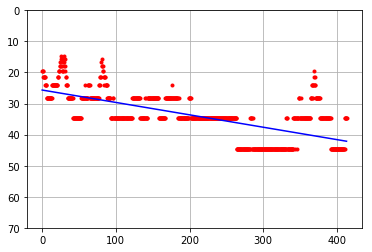

In [233]:
t = 49
rho = 1023.3
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [234]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US0.3/SalishSea_1h_20160601_20160605_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0438124900972
13.5354118347
44.5177230835


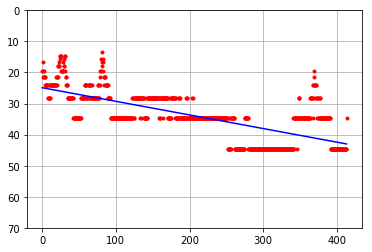

In [243]:
t = 45
rho = 1023.3
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [244]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US0.3/SalishSea_1h_20160601_20160605_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0455377026095
13.5354118347
44.5177230835


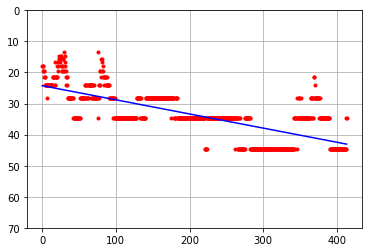

In [249]:
t = 41
rho = 1023.3
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [250]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24UW0.3/SalishSea_1h_20170101_20170105_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.036735750191
16.7611732483
44.5177230835


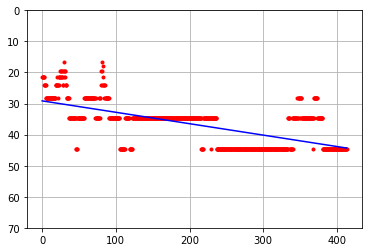

In [265]:
t = 51
rho = 1023.7
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [266]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48UW0.3/SalishSea_1h_20170101_20170105_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0407482706168
15.6342878342
58.4843330383


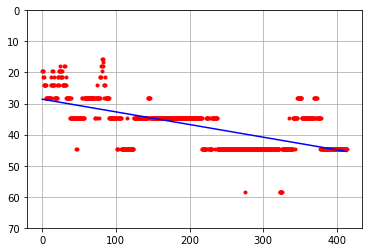

In [271]:
t = 48
rho = 1023.7
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())

In [272]:
file1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72UW0.3/SalishSea_1h_20170101_20170105_grid_T.nc')
deptht = file1.variables['deptht'][:]
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

0.0402971862284
14.5689821243
58.4843330383


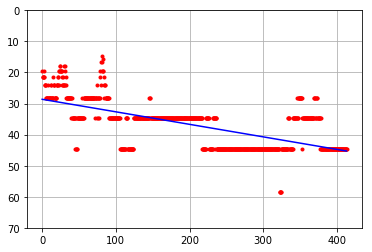

In [280]:
t = 41
rho = 1023.7
var = density1[t,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)
xx_thal = distance
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, xx_thal[0,:], list_of_depths1)
plt.plot(xx_thal[0,:], list_of_depths1, 'r.')
plt.plot(xx_thal[0,:], func(xx_thal[0,:], *popt), 'b-')
plt.grid('on')
plt.ylim(70,0)
print(popt[0])
print(list_of_depths1.min())
print(list_of_depths1.max())